In [20]:
!pip install pprint

ERROR: Could not find a version that satisfies the requirement pprint (from versions: none)
ERROR: No matching distribution found for pprint

[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [21]:
import matplotlib.pyplot as plt
import numpy as np
from pprint import pprint
from scipy.io import wavfile

In [22]:
# create the signal 
duration = 10  # seconds
wav_raw_data = wavfile.read("output/Portal_Radio_output.wav")
fs = wav_raw_data[0]  # sample frequency in Hz
signal = wav_raw_data[1] / 2 ** 15  # normalize to [-1, 1]
signal.shape

(9922500,)

In [23]:
# Split the signal into chunks
chunk_size = int(fs // 2.5)  # 1 second chunks
num_chunks = len(signal) // chunk_size
print("num_chunks", num_chunks)
chunks = np.array(np.split(signal[:num_chunks * chunk_size], num_chunks))

num_chunks 562


In [24]:
pprint(chunks)
chunks.shape


array([[ 0.        ,  0.        ,  0.        , ..., -0.03411865,
        -0.03024292, -0.02832031],
       [-0.02542114, -0.01419067, -0.00091553, ..., -0.03622437,
        -0.03213501, -0.02529907],
       [-0.02832031, -0.02667236, -0.01940918, ..., -0.07781982,
        -0.06997681, -0.06588745],
       ...,
       [-0.00735474, -0.02444458, -0.02828979, ...,  0.00283813,
         0.00289917,  0.00109863],
       [-0.00311279, -0.0105896 , -0.01922607, ..., -0.01483154,
        -0.01345825, -0.0133667 ],
       [-0.01431274, -0.01126099, -0.00186157, ..., -0.00949097,
        -0.00946045, -0.009552  ]])


(562, 17640)

In [25]:
# Compute the FFT for each chunk
fft_chunks = np.array([np.fft.fft(chunk) for chunk in chunks])
fft_chunks.shape

(562, 17640)

In [26]:
# Compute the frequencies for the x-axis
frequencies = np.fft.fftfreq(chunk_size, 1 / fs)
frequencies

array([ 0. ,  2.5,  5. , ..., -7.5, -5. , -2.5])

In [27]:
# find the dominant frequency
dominant_frequencies = np.abs(fft_chunks)[0].argmax()
dominant_frequencies


117

(562, 8820)


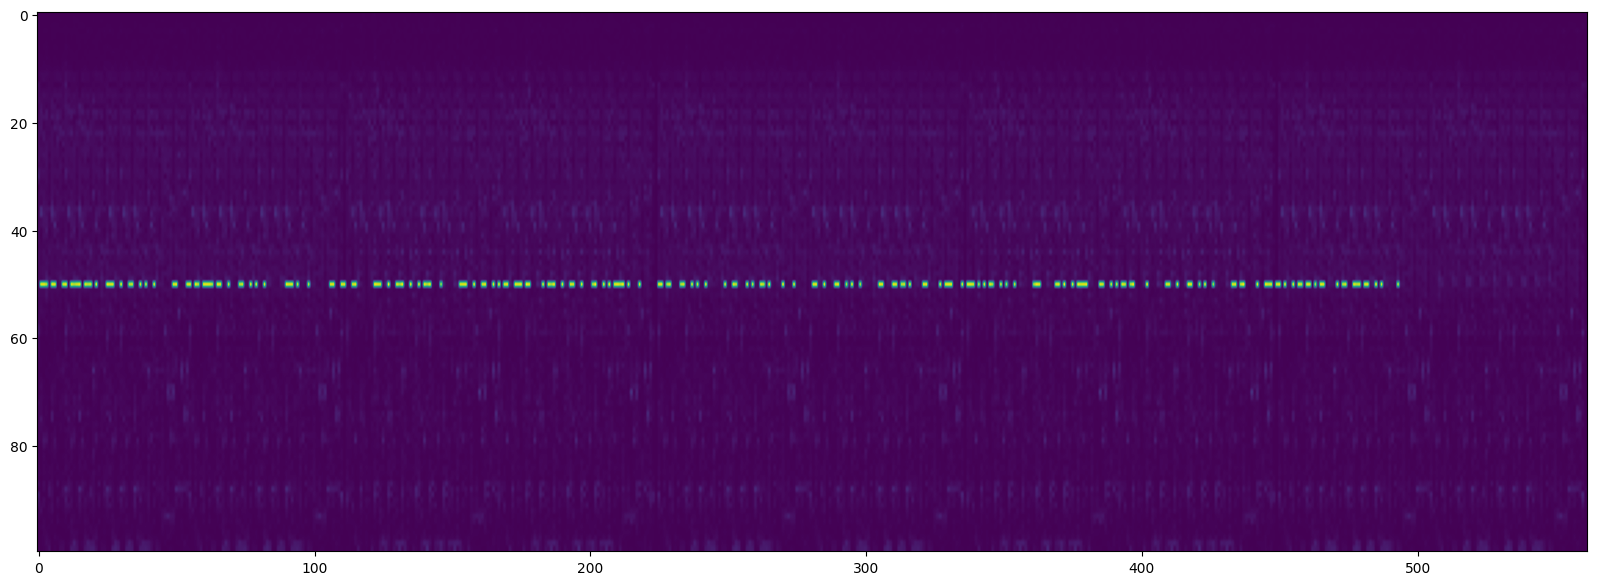

In [28]:
fft_mags = np.abs(fft_chunks)
fft_mags = np.array([fft_mag[:len(fft_mag) // 2] for fft_mag in fft_mags])
print(fft_mags.shape)
frequencies_chunk = frequencies[:len(frequencies) // 2]
fft_mags = fft_mags.T
fig = plt.figure(figsize=(20, 7))
plt.imshow(fft_mags[0:100, :], aspect='auto')


# decode the code

In [29]:
bin_number = 50

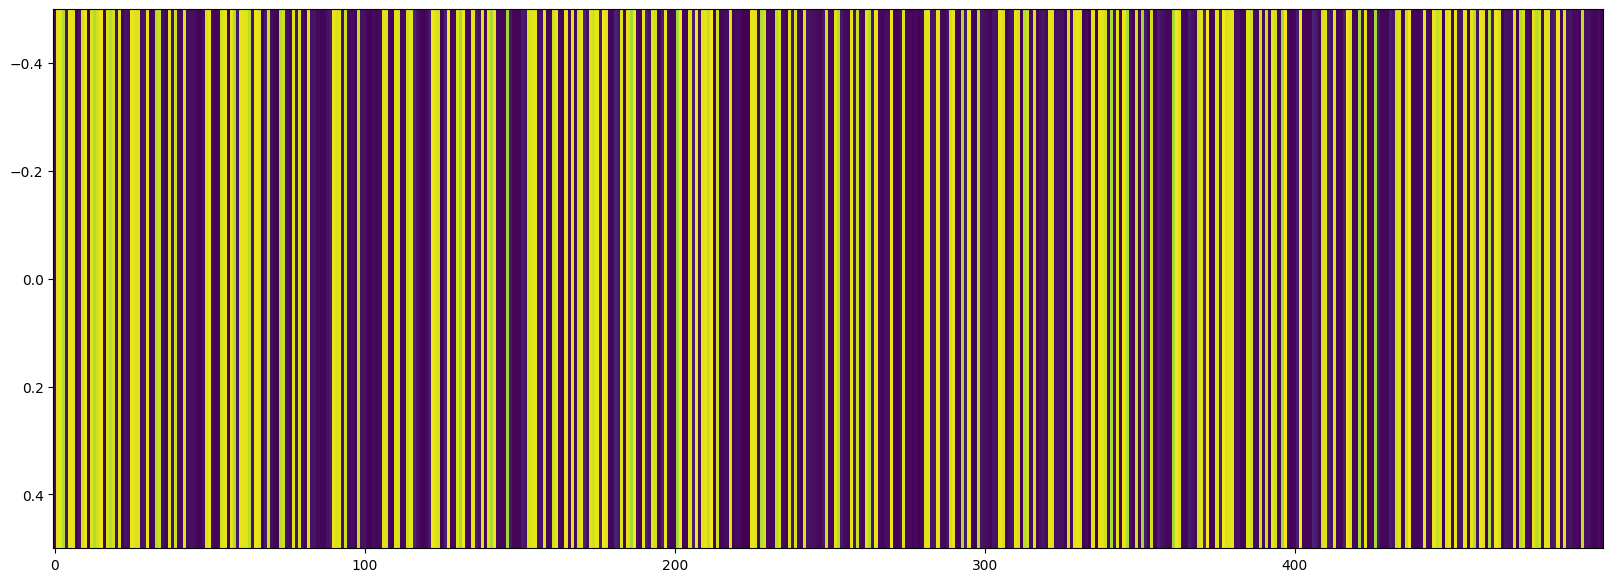

In [30]:
fig = plt.figure(figsize=(20, 7))
plt.imshow(fft_mags[bin_number:bin_number+1, :500], aspect='auto')

In [31]:
fft_mags[bin_number:bin_number+1, :]

array([[  83.96732171, 3241.37955533, 3264.51929114, 2996.65386645,
         210.23677811, 3276.00577043, 3250.37575248,   58.8523068 ,
         164.09459202, 3173.90273868, 3285.66862313,   37.96256332,
        3215.93062748, 2994.60752214, 3155.15917552, 3299.80754334,
          43.35847664, 3199.70861451, 3014.45644022, 3140.31867163,
         140.7763683 , 3257.55266466,   65.80810167,  177.61065994,
         147.86415671, 3296.86908098, 3205.71067007, 3233.39209908,
         176.41981436,  212.34470831, 3277.72483476,   56.50541197,
          63.46676349, 3012.72342167, 3124.32566001,  113.83134535,
          62.13273935, 3226.90960994,  158.73938362, 3111.93055466,
         104.002052  ,  106.15876542, 3233.99165627,  122.89796552,
         151.55756037,  149.03452765,   54.36457567,   33.52811653,
         105.51715854, 3212.01117932, 3277.55309911,   89.93932743,
          45.000067  ,   96.21157138, 3173.5660967 , 3266.17594889,
          63.13294475, 3265.4542014 , 3002.80567

In [32]:
binary = np.where(fft_mags[bin_number:bin_number+1, :] > 1000, 1, 0)


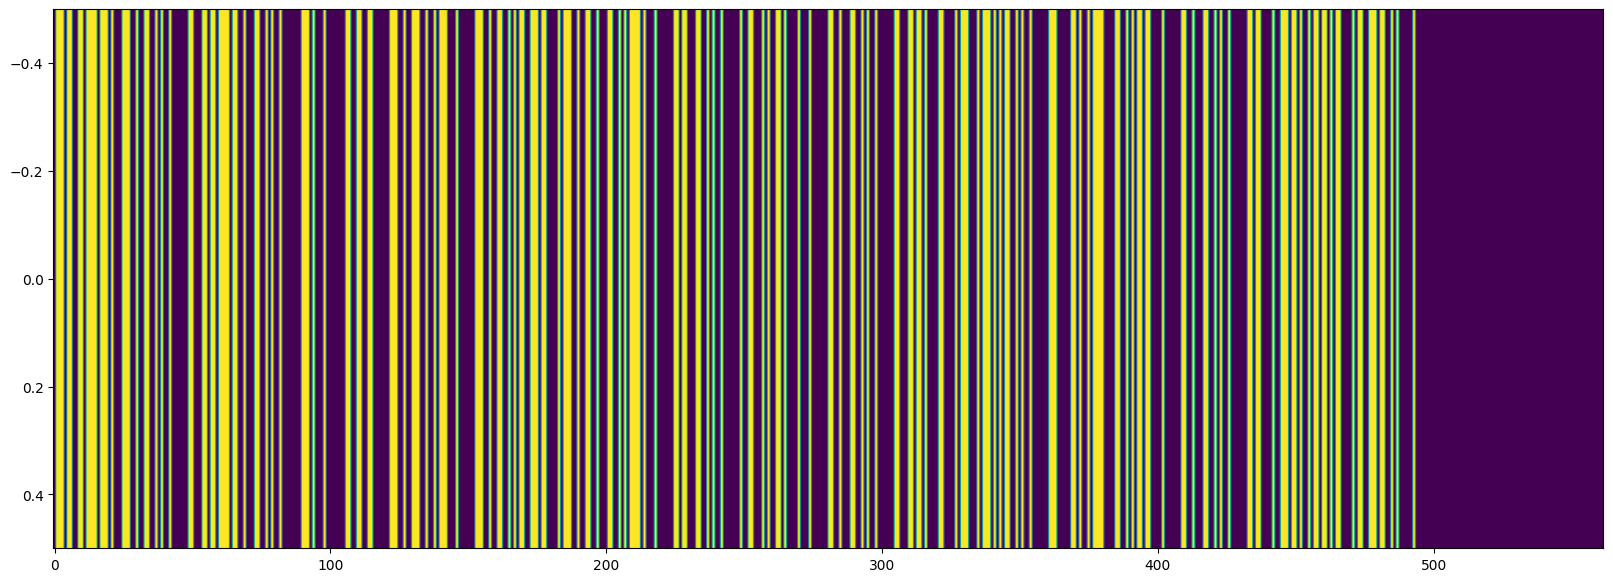

In [33]:
fig = plt.figure(figsize=(20, 7))
plt.imshow(binary, aspect='auto')


In [34]:
binary

array([[0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
        0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0,
        0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1,
        1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
        0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
        1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1,
        1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
        1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
        0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1,
        0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0,
        0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0,
        1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1,
        0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
        0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 

In [35]:
binary = "".join([str(bit) for bit in binary[0]])
binary

'0111011001101111011101000111001001100101001000000110001101101111011001000110010100100000001110100010000000110011001100000011100100111001001011100010000001110010011001010110011101100001011100100110010001100101011110100010000001101100011001010010000001001100010100110100001000100000011001000110010100100000011000110110100001100001011100010111010101100101001000000111000001101001011110000110010101101100001000000110010001100101001000000110110000100111011010010110110101100001011001110110010100000100000000000000000000000000000000000000000000000000000000000000000000'

In [36]:
binary[0]

'0'

In [37]:
message = ""
for i in range(len(binary) // 8):
    byte= binary[i * 8: (i + 1) * 8]
    message += chr(int(byte, 2))
message

"votre code : 3099. regardez le LSB de chaque pixel de l'image\x04\x00\x00\x00\x00\x00\x00\x00\x00"

In [38]:
help(int)

Help on class int in module builtins:

class int(object)
 |  int([x]) -> integer
 |  int(x, base=10) -> integer
 |
 |  Convert a number or string to an integer, or return 0 if no arguments
 |  are given.  If x is a number, return x.__int__().  For floating point
 |  numbers, this truncates towards zero.
 |
 |  If x is not a number or if base is given, then x must be a string,
 |  bytes, or bytearray instance representing an integer literal in the
 |  given base.  The literal can be preceded by '+' or '-' and be surrounded
 |  by whitespace.  The base defaults to 10.  Valid bases are 0 and 2-36.
 |  Base 0 means to interpret the base from the string as an integer literal.
 |  >>> int('0b100', base=0)
 |  4
 |
 |  Built-in subclasses:
 |      bool
 |
 |  Methods defined here:
 |
 |  __abs__(self, /)
 |      abs(self)
 |
 |  __add__(self, value, /)
 |      Return self+value.
 |
 |  __and__(self, value, /)
 |      Return self&value.
 |
 |  __bool__(self, /)
 |      True if self else False
